In [1]:
from sklearn.datasets import load_digits
import numpy as np
import matplotlib.pyplot as plt

In [2]:
digits = load_digits()

In [3]:
print('Image Data Shape : ',digits.data.shape)
print('Label Data Shape : ',digits.target.shape)

Image Data Shape :  (1797, 64)
Label Data Shape :  (1797,)


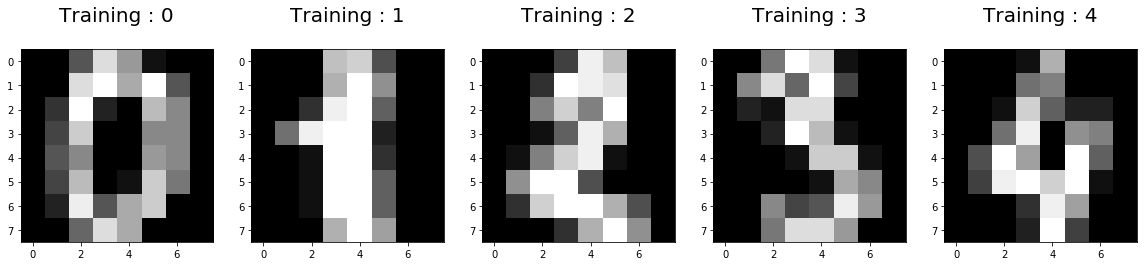

In [4]:
plt.figure(figsize = (20,4))
for index , (image,label) in enumerate(zip(digits.data[0:5] , digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image , (8,8)) , cmap = plt.cm.gray)
    plt.title("Training : %i\n" % label , fontsize = 20)

In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test , y_train , y_test = train_test_split(digits.data , digits.target , test_size = 0.25 , random_state = 100)

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

In [7]:
model1 = LogisticRegression()
model2 = KNeighborsClassifier()
model3 = SVC(kernel='linear',C=3)

In [8]:
model1.fit(X_train , y_train)
model2.fit(X_train, y_train)
model3.fit(X_train, y_train)

SVC(C=3, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [9]:
predictions1 = model1.predict(X_test)
predictions2 = model2.predict(X_test)
predictions3 = model3.predict(X_test)

In [10]:
from sklearn.metrics import classification_report, accuracy_score
print('Logistic Regression Classification Report :\n')
print(classification_report(y_test , predictions1))
print('Accuracy Score : %0.2f' % accuracy_score(y_test, predictions1))

Logistic Regression Classification Report :

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.90      0.97      0.94        37
          2       1.00      0.98      0.99        51
          3       0.91      1.00      0.95        39
          4       0.98      0.96      0.97        54
          5       0.98      0.98      0.98        43
          6       0.98      0.98      0.98        47
          7       0.95      0.95      0.95        44
          8       0.86      0.90      0.88        41
          9       0.97      0.82      0.89        45

avg / total       0.96      0.96      0.96       450

Accuracy Score : 0.96


In [11]:
print('KNN Classification Report :\n')
print(classification_report(y_test , predictions2))
print('Accuracy Score : %0.2f' % accuracy_score(y_test, predictions2))

KNN Classification Report :

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.97      1.00      0.99        37
          2       1.00      0.98      0.99        51
          3       1.00      1.00      1.00        39
          4       1.00      0.96      0.98        54
          5       1.00      1.00      1.00        43
          6       1.00      0.98      0.99        47
          7       0.96      1.00      0.98        44
          8       0.95      0.98      0.96        41
          9       1.00      1.00      1.00        45

avg / total       0.99      0.99      0.99       450

Accuracy Score : 0.99


In [12]:
print('SVM Classification Report :\n')
print(classification_report(y_test , predictions3))
print('Accuracy Score : %0.2f' % accuracy_score(y_test, predictions3))

SVM Classification Report :

             precision    recall  f1-score   support

          0       1.00      1.00      1.00        49
          1       0.93      1.00      0.96        37
          2       1.00      1.00      1.00        51
          3       1.00      0.97      0.99        39
          4       1.00      1.00      1.00        54
          5       0.98      1.00      0.99        43
          6       1.00      0.98      0.99        47
          7       1.00      1.00      1.00        44
          8       0.97      0.90      0.94        41
          9       0.98      1.00      0.99        45

avg / total       0.99      0.99      0.99       450

Accuracy Score : 0.99


In [13]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
cm1 = confusion_matrix(y_test,predictions1)
cm2 = confusion_matrix(y_test,predictions2)
cm3 = confusion_matrix(y_test,predictions3)

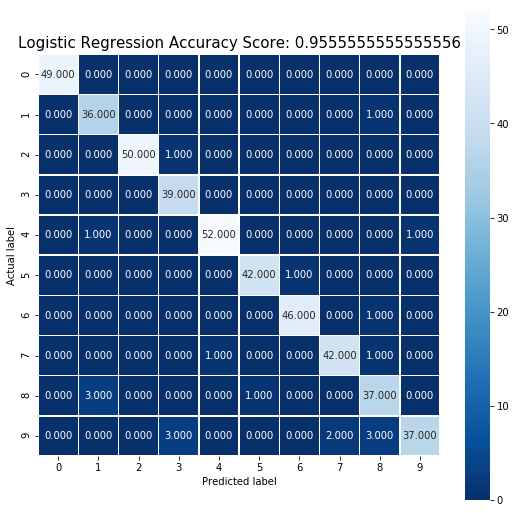

In [14]:
plt.figure(figsize=(9,9))
sns.heatmap(cm1, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Logistic Regression Accuracy Score: {0}'.format(accuracy_score(y_test,model1.predict(X_test)))
plt.title(all_sample_title, size = 15);
plt.savefig('Logistic_Regression_Confusion_Matrix.png')
plt.show()

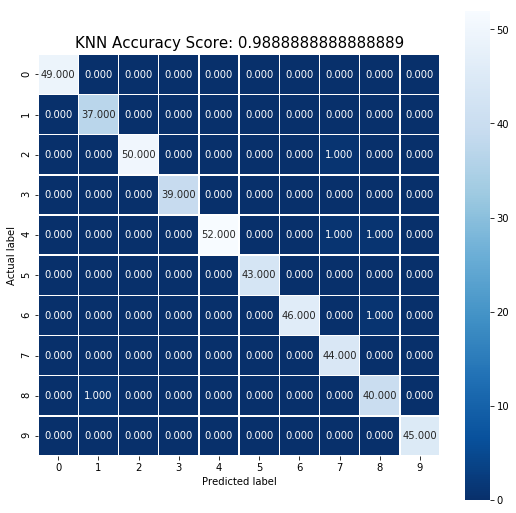

In [15]:
plt.figure(figsize=(9,9))
sns.heatmap(cm2, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'KNN Accuracy Score: {0}'.format(accuracy_score(y_test,model2.predict(X_test)))
plt.title(all_sample_title, size = 15);
plt.savefig('KNN_Confusion_Matrix.png')
plt.show()

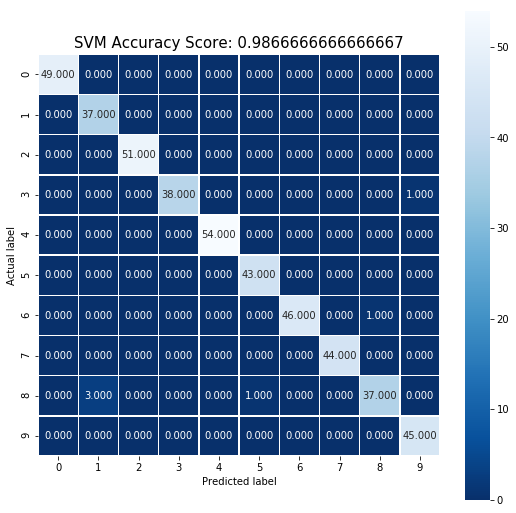

In [16]:
plt.figure(figsize=(9,9))
sns.heatmap(cm3, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'SVM Accuracy Score: {0}'.format(accuracy_score(y_test,model3.predict(X_test)))
plt.title(all_sample_title, size = 15);
plt.savefig('SVM_Confusion_Matrix.png')
plt.show()

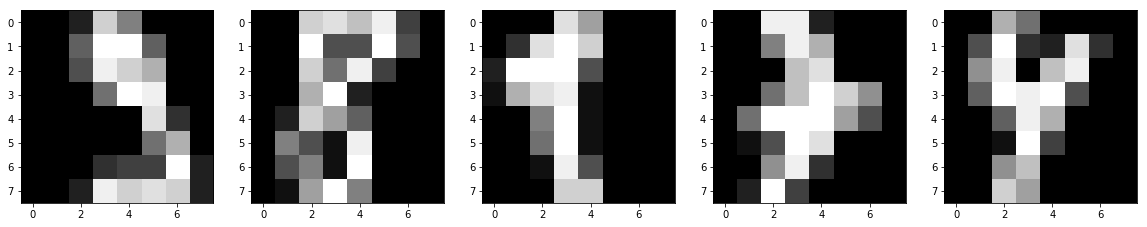

In [17]:
#Missclassified Images of Logistic Regression
index1 = 0
misclassifiedIndexes1 = []
for label1, predict1 in zip(y_test, predictions1):
    if label1 != predict1: 
        misclassifiedIndexes1.append(index1)
    index1 +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes1[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)

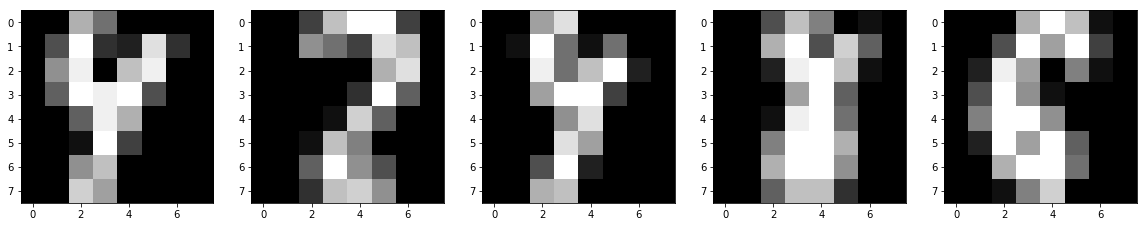

In [18]:
#Missclassified Images of KNN
index2 = 0
misclassifiedIndexes2 = []
for label2, predict2 in zip(y_test, predictions2):
    if label2 != predict2: 
        misclassifiedIndexes2.append(index2)
    index2 +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes2[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)

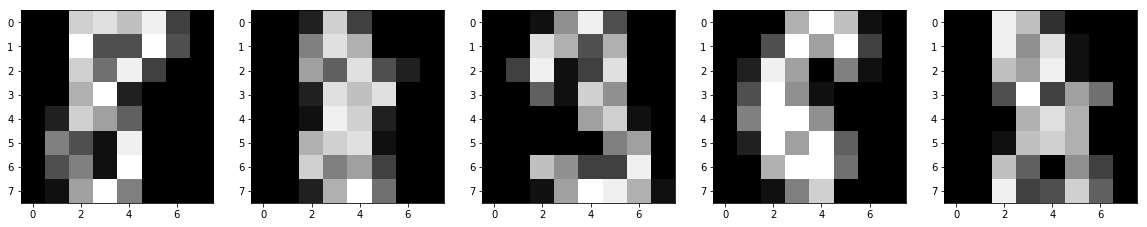

In [22]:
#Missclassified Images of SVM
index3 = 0
misclassifiedIndexes3 = []
for label3, predict3 in zip(y_test, predictions3):
    if label3 != predict3: 
        misclassifiedIndexes3.append(index3)
    index3 +=1
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes3[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (8,8)), cmap=plt.cm.gray)